In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
# from tqdm.auto import tqdm
from IPython.display import clear_output

In [21]:
# without numba this is very slow
@jit(nopython=True) 
def count_arround(field):
    
    results_list = []
    neighbor_count = []
    rows,cols = field.shape
    search_area = [-1,0,1]
    row_count = 0
    for row in field:
        cell_count = 0
        
        for cell in row:
#             start count at -1 as each pixel coutns itself as a neighbor
            neighbors = -1
            for relative_row_pos in search_area:
                abs_row = row_count+relative_row_pos
#                 if -1 < abs_row < rows:
                if abs_row == -1:
                    abs_row = rows-1
                if abs_row == rows:
                    abs_row = 0
                    
                for relative_col_pos in search_area:
                    abs_col = cell_count+relative_col_pos
                    if abs_col == -1:
                        abs_col = cols-1
                    if abs_col == cols:
                        abs_col = 0
#                         if -1 < abs_col < cols:
#                                 check_loc = [[abs_row],[abs_col]]
                    check_loc = (abs_row,abs_col)
#                                 print(check_loc)
                    if field[check_loc]:
                        neighbors += 1
            
            new_value = 0
            if cell:
#                 rule 1 underpopulation
                if neighbors < 2: 
                    new_value = 0
#                     rule 2 next generation
                if 2 <= neighbors <= 3:
                    new_value = 1
#                     rule 3 overpopulation
                else:
                    new_value = 0
            else:
#                 rule 4 reproduction
                if neighbors >= 3:
                    new_value = 1
    
            results_list.append(new_value)
            neighbor_count.append(neighbors)

      
            cell_count += 1
        row_count += 1
        
    results_list = np.array(results_list)
    changes = np.reshape(results_list,field.shape)
    
    neighbor_count = np.array(neighbor_count)
    neighbor_count = np.reshape(neighbor_count,field.shape)
    
    return [changes,neighbor_count]

In [22]:
import time

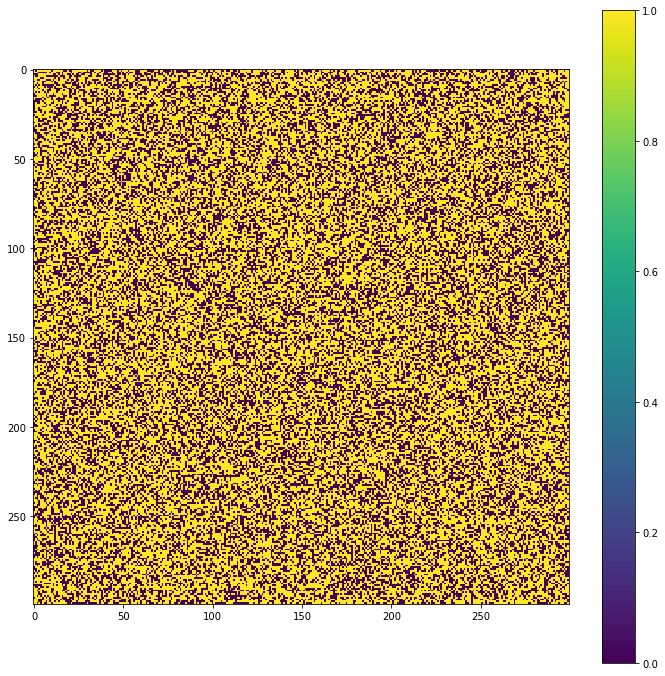

In [31]:
# generate a random starting array
# percentage of pixels that start off 'alive'
alive_pct = 0.6
field_size = 300
# build random array
field = np.random.uniform(low=0.0, high=1.0,size = [field_size,field_size]) < alive_pct

# display array 
plt.figure(figsize = (12,12))
plt.imshow(field, interpolation='none')
plt.colorbar()

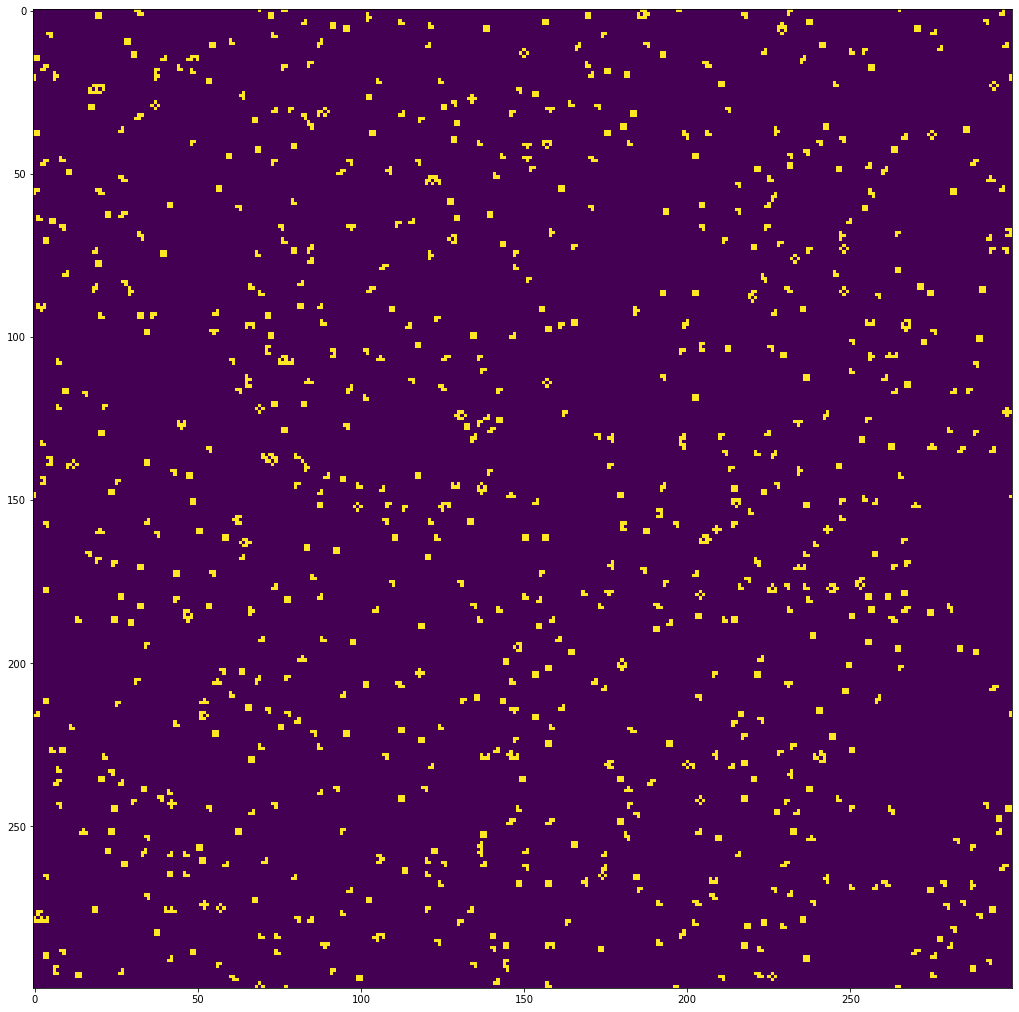

In [32]:
for i in range(0,80):
    print(i)
    clear_output(wait=True)
    past_field = np.copy(field)
    field,neighbor_count = count_arround(field)
    plt.figure(figsize = (18,18))
    plt.imshow(field, interpolation='none')
#     plt.imshow(neighbor_count, interpolation='none')
#     plt.colorbar()
    plt.show()
    
    if np.array_equal(past_field,field):
        print('no change, stopping early')
        break
    



In [52]:
%%time
for i in range(0,80):
    field,na = count_arround(field)

CPU times: user 11.8 s, sys: 3.81 ms, total: 11.8 s
Wall time: 11.8 s
